In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
import mne, re, os
import torch
import pickle

from utils import get_fsaverage, get_labels, get_raw, get_raw_chops

In [7]:
SNR = 100.0
PARCELLATION = 'aparc.a2009s'
#PARCELLATION = 'HCPMMP1_combined'
DATA_PATH = '/home/williamtheodor/Documents/DL for EEG Classification/data/'

data_dict = load_mmidb_data_dict(DATA_PATH, PARCELLATION, SNR)

## CONCEPTS

In [6]:
band = 'Alpha'

patient = 'S002'
run = 'R03'
FILE = f'../../data/eegmmidb (raw)/files/{patient}/{patient}{run}.edf'

subjects_dir, subject, trans, src_path, bem_path=get_fsaverage()
labels = get_labels(subjects_dir, parcellation_name=PARCELLATION)
label_names = [label.name for label in np.array(labels).flatten()]

raw = get_raw(FILE)
annotations = get_annotations(FILE)

annotation_dict = get_window_dict(raw, annotations)

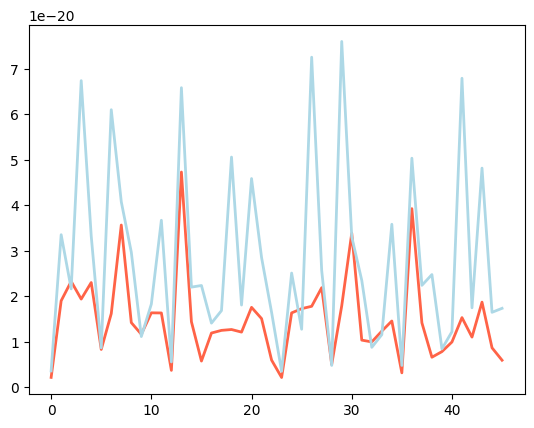

In [7]:
baseline_open = data_dict[band][patient][patient+'R01']['T0'][0]
baseline_closed = data_dict[band][patient][patient+'R02']['T0'][0]

open_color = 'tomato'
closed_color = 'lightblue'

plt.plot(baseline_open, c=open_color, linewidth=2.0)
plt.plot(baseline_closed, c=closed_color, linewidth=2.0)

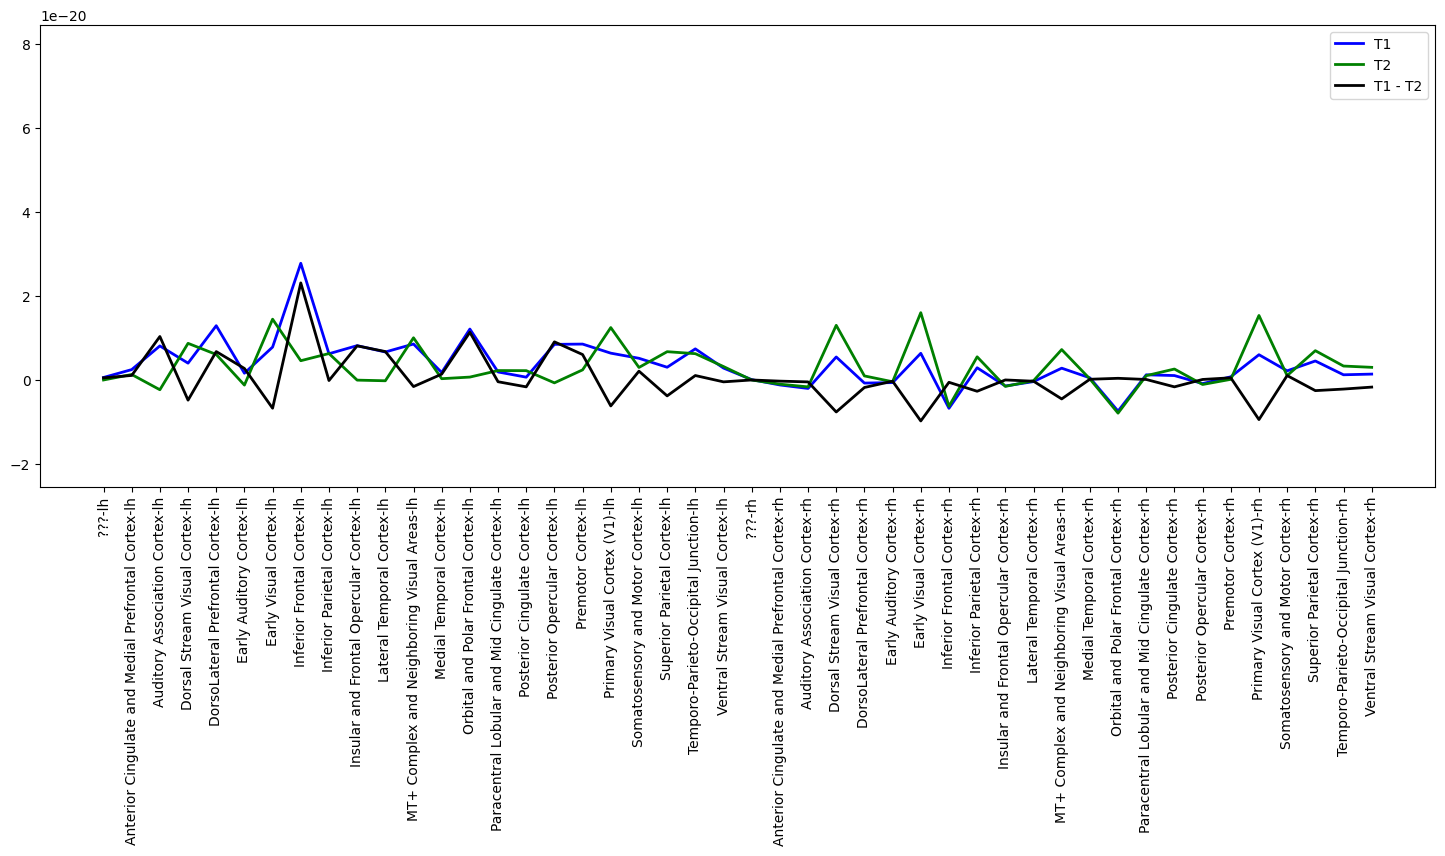

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))

alpha = 0.0
lw_thick = 2
for i in range(7):
    activity_T1 = data_dict['Alpha'][patient][patient+run]['T1'][i]
    activity_T2 = data_dict['Alpha'][patient][patient+run]['T2'][i]
    ax.plot(activity_T1, c='r', alpha=alpha)
    ax.plot(activity_T2, c='orange', alpha=alpha)
    ax.plot(activity_T1 - baseline_open, c='b', alpha=alpha)
    ax.plot(activity_T2 - baseline_open, c='g', alpha=alpha)

#ax.plot(baseline_open, c='k', linewidth=lw_thick)
mean_T1 = np.mean(data_dict['Alpha'][patient][patient+run]['T1'], axis=0)
mean_T2 = np.mean(data_dict['Alpha'][patient][patient+run]['T2'], axis=0)
#ax.plot(mean_T1, c='r', linewidth=lw_thick)
#ax.plot(mean_T2, c='orange', linewidth=lw_thick)
ax.plot(mean_T1 - baseline_open, c='b', linewidth=lw_thick, label='T1')
ax.plot(mean_T2 - baseline_open, c='g', linewidth=lw_thick, label='T2')
ax.plot(mean_T1 - mean_T2, c='k', linewidth=lw_thick, label='T1 - T2')

ax.legend()

ax.set_xticks(np.arange(len(label_names)))
ax.set_xticklabels(label_names, rotation=90)
plt.show()